# Experimento: Classificador de Diabetes

### Importação dos Conjuntos de Dados
A função **read_csv()** permite que possa ser importado o arquivo de predição em CSV. Adicionalmente a função **joblib.load** será utilizada para importar o modelo gerado na fase de processamento.

In [6]:
import joblib
import pandas as pd

x_train = pd.read_csv('Files/X_train.csv')
x_test = pd.read_csv('Files/X_test.csv')
y_train = pd.read_csv('Files/y_train.csv')
y_test = pd.read_csv('Files/y_test.csv')

y_pred_tree = pd.read_csv('Files/predicted_y_tree.csv')
y_pred_rf = pd.read_csv('Files/predicted_y_rf.csv')
y_pred_mlp = pd.read_csv('Files/predicted_y_mlp.csv')

clf_tree = joblib.load('Model/modelo_arvore_decisao.pkl')
clf_rf = joblib.load('Model/modelo_random_forest.pkl')
clf_mlp = joblib.load('Model/modelo_mlp.pkl')

## Avaliação
*** 

**tp** (verdadeiros positivos): casos cassificados parar uma classe corretamente<br>
**fp** (falsos positivos): casos classificados para uma classe incorretamente<br>
**tn** (verdadeiros negativos): casos classificados corretamente como falsos<br>
**fn** (falsos negativos): casos considerados de outra classe mas deveriam ser da classe em questão<br>
<br>
**Suporte**: tp + fp, ou seja, o total de casos</br>
**Precisão**: tp / (tp + fp), ou seja, proporção dos acertos em classificar exemplos positivos <br>
**Recall**: tp / (tp + fn), ou seja, proporção de acertos entre todas as classes<br>
**f1-score**: média harmônica entre a Precisão e o Recall<br>
**Acurácia**: soma do tp de todas as classes dividido pelo número de instâncias do dataset de teste (resulta em uma percentagem).<br>

Uma ótima imagem ilustrativa sobre estas métricas pode ser encontrada na __[Wikipédia](https://pt.wikipedia.org/wiki/Precis%C3%A3o_e_revoca%C3%A7%C3%A3o#/media/Ficheiro:Precis%C3%A3o_e_revoca%C3%A7%C3%A3o.png)__


In [7]:
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

print("Árvore de Decisão - Acurácia:", metrics.accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree, target_names=['Positive', 'Negative']))

print("Random Forest - Acurácia:", metrics.accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, target_names=['Positive', 'Negative']))

print("MLPClassifier (Rede Neural) - Acurácia:", metrics.accuracy_score(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp, target_names=['Positive', 'Negative']))                                                                       

Árvore de Decisão - Acurácia: 0.9615384615384616
              precision    recall  f1-score   support

    Positive       0.91      0.98      0.95        54
    Negative       0.99      0.95      0.97       102

    accuracy                           0.96       156
   macro avg       0.95      0.97      0.96       156
weighted avg       0.96      0.96      0.96       156

Random Forest - Acurácia: 0.9935897435897436
              precision    recall  f1-score   support

    Positive       0.98      1.00      0.99        54
    Negative       1.00      0.99      1.00       102

    accuracy                           0.99       156
   macro avg       0.99      1.00      0.99       156
weighted avg       0.99      0.99      0.99       156

MLPClassifier (Rede Neural) - Acurácia: 0.9743589743589743
              precision    recall  f1-score   support

    Positive       0.95      0.98      0.96        54
    Negative       0.99      0.97      0.98       102

    accuracy                 

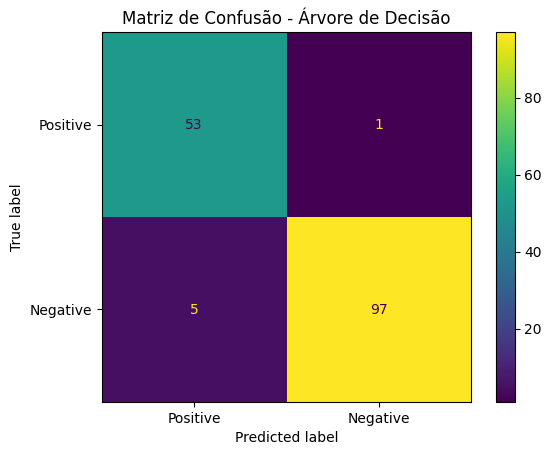

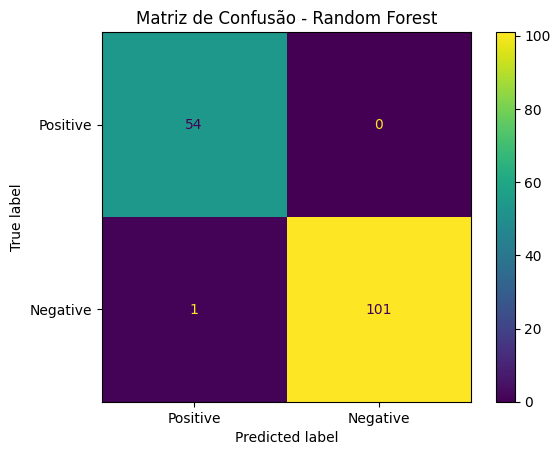

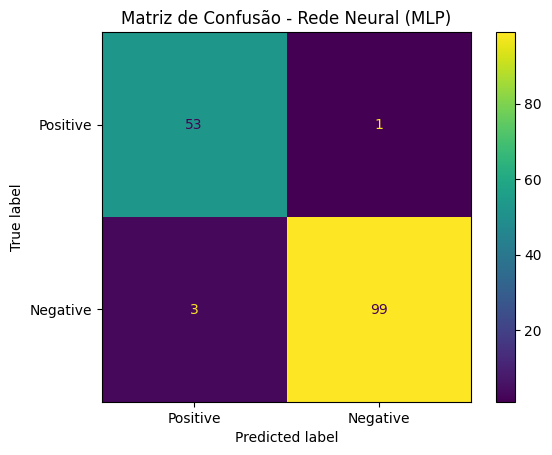

In [8]:
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(
    clf_tree, x_test, y_test, display_labels=['Positive', 'Negative']
)
plt.title("Matriz de Confusão - Árvore de Decisão")
plt.show()

ConfusionMatrixDisplay.from_estimator(
    clf_rf, x_test, y_test, display_labels=['Positive', 'Negative']
)
plt.title("Matriz de Confusão - Random Forest")
plt.show()

ConfusionMatrixDisplay.from_estimator(
    clf_mlp, x_test, y_test, display_labels=['Positive', 'Negative']
)
plt.title("Matriz de Confusão - Rede Neural (MLP)")
plt.show()